In [214]:
# Initial imports

from __future__ import division

import numpy as np
import pandas as pd 
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

In [215]:
# Imports for better visualization

from collections import defaultdict
import json

import scipy as sp

from matplotlib import rcParams
import matplotlib.cm as cm
import matplotlib as mpl

#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'

C:\Users\NISHANT\Anaconda3\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [216]:
# Reading file after changing the encoding 
nflix = pd.read_csv('netflix2.csv', encoding='latin-1',header = None)

In [217]:
nflix.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,1,Toy Story (1995),01-Jan-95,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN
1,2,GoldenEye (1995),01-Jan-95,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,NaN,NaN,NaN,NaN,NaN
2,3,Four Rooms (1995),01-Jan-95,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,NaN,NaN,NaN,NaN,NaN
3,4,Get Shorty (1995),01-Jan-95,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN
4,5,Copycat (1995),01-Jan-95,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0.0,NaN,NaN,NaN,NaN,NaN


In [218]:
del nflix[23]
del nflix[24]
del nflix[25]
del nflix[26]
del nflix[27]

In [219]:
nflix.isnull().sum()

0     0
1     0
2     1
3     2
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    1
dtype: int64

In [220]:
nflix[3].fillna('0',inplace = True)
nflix[2].fillna('0',inplace = True)
nflix[22].fillna('0',inplace = True)

In [221]:
del nflix[2]
del nflix[3]

In [222]:
#del nflix[0]

In [223]:
nflix.head()

,0,1,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,1,Toy Story (1995),0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [224]:
for i in range(0,1682):
     if((nflix[5][i]!='0') and (nflix[5][i]!='1')):
            nflix[5][i]='0'
    
        
    
        
      

C:\Users\NISHANT\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [225]:
#Deleting nflix[4] as it has only one movie as 1 under it 
del nflix[4]

In [226]:
nflix[10].value_counts()

0    1540
1     142
Name: 10, dtype: int64

In [227]:
nflix.head()

,0,1,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,1,Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [228]:
for i in range(0,1682):
     if((nflix[6][i]!='0') and (nflix[6][i]!='1')):
            nflix[6][i]='0'
for i in range(0,1682):
     if((nflix[7][i]!='0') and (nflix[7][i]!='1')):
            nflix[7][i]='0'
for i in range(0,1682):
     if((nflix[8][i]!='0') and (nflix[8][i]!='1')):
            nflix[8][i]='0'
for i in range(0,1682):
     if((nflix[9][i]!='0') and (nflix[9][i]!='1')):
            nflix[9][i]='0'

C:\Users\NISHANT\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\NISHANT\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\NISHANT\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\NISHANT\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be 

In [229]:
nflix[6] = nflix[6].astype('int32')
nflix[7] = nflix[7].astype('int32')
nflix[8] = nflix[8].astype('int32')
del nflix[9]

In [230]:
nflix.describe()

,0,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21
count,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.00000,1682.000000
mean,841.500000,0.067776,0.043995,0.068966,0.084423,0.073127,0.324019,0.048157,0.089180,0.052319,0.029727,0.042212,0.121284,0.062426,0.14566,0.052913
std,485.695893,0.251436,0.205145,0.253469,0.278104,0.260423,0.468146,0.214161,0.285087,0.222735,0.169882,0.201131,0.326554,0.241999,0.35287,0.223927
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,421.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,841.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,1261.750000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
max,1682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


In [231]:
nflix.head()

,0,1,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22
0,1,Toy Story (1995),0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [232]:
nflix[22].astype('int32')


0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      1
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
30      0
31      0
32      0
33      0
34      0
35      0
36      0
37      1
38      0
39      0
40      0
41      0
42      0
43      0
44      0
45      0
46      0
47      0
48      0
49      0
50      1
51      0
52      0
53      0
54      0
55      0
56      0
57      0
58      0
59      0
60      0
61      0
62      0
63      0
64      0
65      0
66      0
67      1
68      0
69      0
70      0
71      0
72      1
73      0
74      0
75      0
76      1
77      0
78      1
79      0
80      0
81      0
82      0
83      0
84      0
85      0
86      0
87      0
88      0
89      0
90      0
91      0
92      0
93      0
94      0
95      0
96      1
97      1
98      0
99      0


In [233]:
a = {'Movie' : nflix[1]}
df = DataFrame(data=a)

In [234]:
df.head()

,Movie
0,Toy Story (1995)
1,GoldenEye (1995)
2,Four Rooms (1995)
3,Get Shorty (1995)
4,Copycat (1995)


In [235]:
del nflix[1]

In [236]:
from sklearn.cross_validation import cross_val_score, train_test_split
x_train2, x_test2 = train_test_split(nflix,test_size = 0.11)

In [237]:
#Column 4 to Column 22 represent different Genres of the movies 
##km = KMeans(n_clusters = 5 , init = 'random',n_init = 10,max_iter = 300,tol=1e-04,random_state = 0)

In [238]:
#y_km = km.fit_predict(x_train2)

In [239]:

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [240]:
from IPython.core.interactiveshell import InteractiveShell #Show all consecutive outputs
InteractiveShell.ast_node_interactivity = "all"

In [241]:
for i in range(0,1496):
    nflix['Cat'] = 0

In [205]:
#for i in range(0,1496):
    #nflix['Cat'][i] = y_km[i]

C:\Users\NISHANT\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [242]:
nflix.head()

,0,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,Cat
0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0


In [243]:
#print(('Distortions : %.2f' % km.inertia_))

In [258]:
distortions2 = []
for i in range(1,11):
    kmi = KMeans(n_clusters = i,n_init=10,max_iter=300,random_state=25)
    kmi.fit(x_train2)
    distortions2.append(kmi.inertia_)
    

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=1, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=25, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=25, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=25, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=25, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=25, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=25, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=25, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=25, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=9, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=25, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=25, tol=0.0001, verbose=0)

In [259]:
distortions2

[349809342.2199198,
 88211868.376784399,
 39467023.593405403,
 22051228.34324459,
 14047795.870907763,
 9887337.9739733264,
 7198747.0879297135,
 5533340.5517363213,
 4327986.1420992147,
 3548825.1073113037]

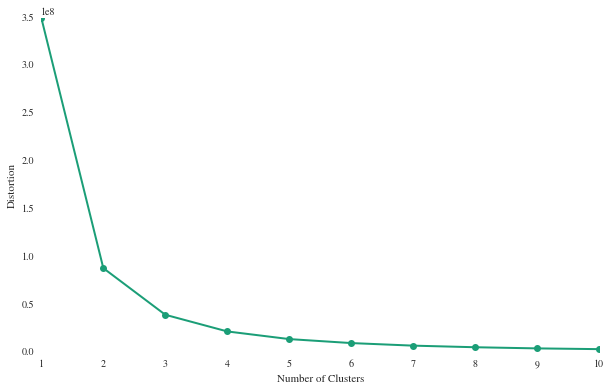

In [260]:
#ELBOW DIAGRAM FOR THE SELECTION OF NUMBER OF CLUSTERS 
plt.plot(range(1,11),distortions2,marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()